In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\jpfla\PycharmProjects\sorteio\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\jpfla\PycharmProjects\sorteio\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install sklearn


You should consider upgrading via the 'c:\Users\jpfla\PycharmProjects\sorteio\venv\Scripts\python.exe -m pip install --upgrade pip' command.


## Imports

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split #separar base para treino e teste
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score #definir a acuracia
import matplotlib.pyplot as plt

## Carregar arquivo + tratamento dos dados

In [2]:
data = pd.read_csv('dados_mega.csv')
data.head()

,Resultado,numero 1,numero 2,numero 3,numero 4,numero 5,numero 6
0,perde,5,9,19,27,50,55
1,perde,11,21,34,44,58,59
2,perde,1,14,31,32,49,57
3,perde,26,29,32,43,49,58
4,perde,13,14,29,32,47,59


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14154 entries, 0 to 14153
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Resultado  14154 non-null  object
 1   numero 1   14154 non-null  int64 
 2   numero 2   14154 non-null  int64 
 3   numero 3   14154 non-null  int64 
 4   numero 4   14154 non-null  int64 
 5   numero 5   14154 non-null  int64 
 6   numero 6   14154 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 774.2+ KB


<AxesSubplot:>

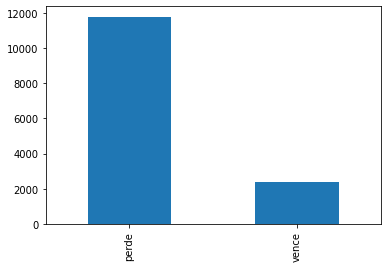

In [6]:
data['Resultado'].value_counts().plot(kind='bar')

<AxesSubplot:>

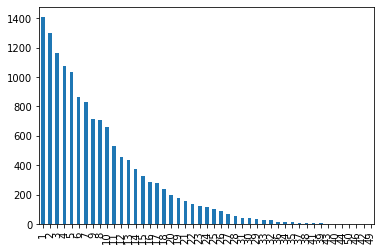

In [9]:
data['numero 1'].value_counts().plot.bar()

<AxesSubplot:>

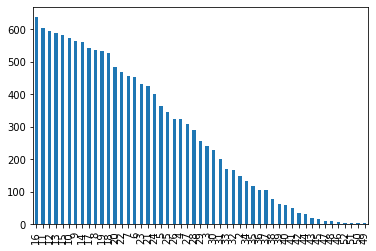

In [10]:
data['numero 2'].value_counts().plot.bar()

In [11]:
data['numero 1'].describe().round(2)

count    14154.0
mean         8.7
std          7.1
min          1.0
25%          3.0
50%          7.0
75%         12.0
max         50.0
Name: numero 1, dtype: float64

## Organizar dados para a ML

In [12]:
data.dtypes

Resultado    object
numero 1      int64
numero 2      int64
numero 3      int64
numero 4      int64
numero 5      int64
numero 6      int64
dtype: object

In [7]:
X = data.drop(columns=['Resultado'])
X

,numero 1,numero 2,numero 3,numero 4,numero 5,numero 6
0,5,9,19,27,50,55
1,11,21,34,44,58,59
2,1,14,31,32,49,57
3,26,29,32,43,49,58
4,13,14,29,32,47,59
...,...,...,...,...,...,...
14149,4,6,19,20,40,41
14150,26,31,36,37,41,42
14151,1,22,29,41,52,53
14152,9,11,28,30,38,44


In [8]:
y = data[['Resultado']]
y

,Resultado
0,perde
1,perde
2,perde
3,perde
4,perde
...,...
14149,vence
14150,perde
14151,perde
14152,perde


In [9]:
len(data)

14154

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15)
print ('Qtd dados para treino: ', len(X_train))
print ('Qtd dados para teste: ', len(X_test))
print ('Total: ', len(X_train)+ len(X_test))

Qtd dados para treino:  12030
Qtd dados para teste:  2124
Total:  14154


In [11]:
obj = KNeighborsClassifier(n_neighbors=6,metric='euclidean')
obj.fit(X_train, y_train)

c:\Users\jpfla\PycharmProjects\sorteio\venv\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [13]:
pip install cPickle

Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement cPickle (from versions: none)
ERROR: No matching distribution found for cPickle
You should consider upgrading via the 'c:\Users\jpfla\PycharmProjects\sorteio\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [17]:
import pickle

with open('teste.pkl', 'wb') as fid:
    pickle.dump(obj, fid)

In [18]:
X_test.head()

,numero 1,numero 2,numero 3,numero 4,numero 5,numero 6
12997,5,7,27,28,38,49
274,6,25,31,37,51,59
3902,8,13,22,31,37,55
5772,3,4,30,31,33,39
3373,4,7,15,46,47,58


In [19]:
y_pred = obj.predict(X_test)
y_pred

array(['perde', 'perde', 'perde', ..., 'perde', 'perde', 'perde'],
      dtype=object)

In [20]:
precisao = accuracy_score(y_test,y_pred)
print ('Precisão de: ',precisao)

Precisão de:  0.8173258003766478


###verificar

In [21]:
data_veri = X_test
data_veri['atual'] = y_test
data_veri['previsao'] = y_pred
data_veri

<ipython-input-21-209b4ee8afbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_veri['atual'] = y_test
<ipython-input-21-209b4ee8afbf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_veri['previsao'] = y_pred


,numero 1,numero 2,numero 3,numero 4,numero 5,numero 6,atual,previsao
12997,5,7,27,28,38,49,perde,perde
274,6,25,31,37,51,59,perde,perde
3902,8,13,22,31,37,55,perde,perde
5772,3,4,30,31,33,39,perde,perde
3373,4,7,15,46,47,58,perde,perde
...,...,...,...,...,...,...,...,...
9874,1,4,18,40,42,45,perde,perde
5705,10,12,50,55,56,60,perde,perde
9653,18,20,22,24,42,49,perde,perde
1584,19,22,36,44,47,57,perde,perde


In [22]:
jogos = data_veri.drop(columns=['numero 1','numero 2','numero 3','numero 4','numero 5','numero 6',])
jogos

,atual,previsao
12997,perde,perde
274,perde,perde
3902,perde,perde
5772,perde,perde
3373,perde,perde
...,...,...
9874,perde,perde
5705,perde,perde
9653,perde,perde
1584,perde,perde


In [23]:
data_veri.query('atual == "vence" & previsao == "vence"')

,numero 1,numero 2,numero 3,numero 4,numero 5,numero 6,atual,previsao
7057,24,33,40,43,46,49,vence,vence
12375,8,9,39,47,57,59,vence,vence
10560,24,33,40,43,46,49,vence,vence
12984,9,21,37,39,43,54,vence,vence


In [ ]:
data_veri.query('previsao == "vence"')

,numero 1,numero 2,numero 3,numero 4,numero 5,numero 6,atual,previsao
2289,23,36,43,44,55,56,vence,vence
6888,2,13,16,18,27,50,perde,vence
2839,25,28,33,36,50,52,perde,vence
492,11,27,41,44,45,48,perde,vence
12614,3,18,25,42,49,56,perde,vence
8911,27,36,38,39,42,55,perde,vence
1591,24,33,40,43,46,49,vence,vence
2178,6,12,25,26,36,38,perde,vence
9958,9,20,44,46,56,60,perde,vence
781,2,13,41,49,51,53,vence,vence


In [24]:
test = obj.predict([[2,21,27,29,32,38]])
test

array(['perde'], dtype=object)

In [121]:
data2 = pd.read_csv('dados_mega.csv')
data2


,Resultado,numero 1,numero 2,numero 3,numero 4,numero 5,numero 6
0,perde,5,11,24,31,37,53
1,perde,3,15,27,29,38,59
2,perde,3,6,14,25,28,50
3,perde,5,6,7,16,33,51
4,perde,12,18,22,29,40,43
...,...,...,...,...,...,...,...
14377,perde,4,7,10,38,39,40
14378,perde,6,7,11,28,34,39
14379,perde,6,17,20,21,44,47
14380,perde,1,6,18,22,30,32


In [122]:
data2.query('Resultado == "perde"', inplace=True)
num_antes = len(data2)
num_antes

11985

In [14]:
numeros_list = [('vence',2,4,6,7,8,9),('vence',2,23,24,25,34,44)]
numeros_list

[('vence', 2, 4, 6, 7, 8, 9), ('vence', 2, 23, 24, 25, 34, 44)]

In [23]:
numeros_list_pandas = pd.DataFrame(numeros_list, columns=['Resultado','numero 1','numero 2','numero 3','numero 4','numero 5','numero 6'])
numeros_list_pandas

,Resultado,numero 1,numero 2,numero 3,numero 4,numero 5,numero 6
0,vence,2,4,6,7,8,9
1,vence,2,23,24,25,34,44


In [24]:
numeros_list_pandas.drop(columns=['Resultado'], inplace=True)


In [29]:
numeros_list_pandas.values[0]

array([2, 4, 6, 7, 8, 9], dtype=int64)

In [79]:
testando = pd.read_csv('dados_mega.csv')
testando.query('Resultado == "perde"', inplace=True)

In [80]:
testando = testando.drop(columns=['Resultado'])

In [83]:
testando

,numero 1,numero 2,numero 3,numero 4,numero 5,numero 6
0,3,8,16,21,37,38
1,24,36,38,40,46,47
2,5,8,10,16,17,47
3,1,4,10,20,57,60
4,1,13,14,16,29,48
...,...,...,...,...,...,...
14365,1,15,18,23,28,29
14366,7,12,21,37,39,44
14367,15,18,33,52,54,57
14368,10,18,30,32,51,60


In [85]:
testando.loc[(testando['numero 1'] == 3) & (testando['numero 2'] == 8) & (testando['numero 3'] == 16)]

,numero 1,numero 2,numero 3,numero 4,numero 5,numero 6
0,3,8,16,21,37,38
897,3,8,16,27,44,45
1869,3,8,16,34,39,44
5331,3,8,16,18,56,60


In [115]:
data2 = pd.read_csv('dados_mega.csv')
data2.query('Resultado == "vence"', inplace=True)
num_antes = len(data2)
dados_antes = data2.values

numeros_list = []
numeros_list = dados_antes
numeros_list= numeros_list.tolist()
numeros_list


[['vence', 6, 11, 16, 23, 36, 42],
 ['vence', 14, 16, 24, 37, 38, 53],
 ['vence', 5, 30, 36, 39, 57, 58],
 ['vence', 2, 24, 32, 50, 54, 59],
 ['vence', 19, 30, 33, 39, 40, 52],
 ['vence', 25, 28, 32, 33, 42, 43],
 ['vence', 3, 11, 13, 27, 32, 47],
 ['vence', 13, 14, 18, 27, 41, 60],
 ['vence', 2, 20, 21, 27, 51, 60],
 ['vence', 3, 14, 52, 55, 57, 60],
 ['vence', 2, 3, 5, 22, 26, 44],
 ['vence', 14, 25, 28, 45, 53, 58],
 ['vence', 11, 17, 20, 39, 43, 53],
 ['vence', 23, 28, 38, 42, 50, 53],
 ['vence', 9, 12, 21, 37, 39, 54],
 ['vence', 19, 23, 30, 37, 49, 55],
 ['vence', 23, 37, 38, 46, 47, 51],
 ['vence', 1, 6, 45, 49, 50, 57],
 ['vence', 2, 14, 18, 29, 36, 38],
 ['vence', 14, 18, 28, 35, 38, 54],
 ['vence', 14, 20, 29, 36, 44, 47],
 ['vence', 2, 18, 30, 31, 45, 56],
 ['vence', 20, 33, 34, 57, 58, 60],
 ['vence', 8, 10, 25, 32, 48, 55],
 ['vence', 2, 10, 12, 30, 41, 42],
 ['vence', 15, 16, 18, 28, 38, 47],
 ['vence', 5, 12, 13, 16, 27, 50],
 ['vence', 5, 12, 15, 19, 29, 52],
 ['vence',

In [116]:
numeros_list_pandas = pd.DataFrame(numeros_list)
numeros_list_pandas
#numeros_list_pandas.drop(columns=['Resultado'], inplace=True)
#valores = numeros_list_pandas.values
#valores

,0,1,2,3,4,5,6
0,vence,6,11,16,23,36,42
1,vence,14,16,24,37,38,53
2,vence,5,30,36,39,57,58
3,vence,2,24,32,50,54,59
4,vence,19,30,33,39,40,52
...,...,...,...,...,...,...,...
2390,vence,2,14,15,19,35,59
2391,vence,24,40,50,52,54,60
2392,vence,18,24,36,44,55,58
2393,vence,30,38,46,51,56,59
